# Analysis of the Spotify Dataset 

### Date: March 13, 2022
### By: Ophelia, Anh, Anthony

## Introduction (an overview of your entire project, your research topic and question, your motivation to study this topic, and any prior related work)

# Introduction (300)

In [125]:
# import all libraries in this cell 
import pandas as pd

In [126]:
# import the dataset 
df = pd.read_csv("spotify_dataset.csv")

## Methods  (explain your data and your analytical process)

### We are interested in the variables that contribute to a factor's popularity. 

Popularity in this dataset is measured on a continuous scale form 1-100. Thus, we are thinking of using the Linear Regression model rather than logistic, random forest and other classication ones from skylearn. 

Note: We will create a new dataframe with the cleaned variables to conduct analysis. This new dataframe with cleaned variables will be called **cleaned_df**. When we finishing cleaning all data, we will add it to this dataframe. 

In [127]:
cleaned_df=pd.DataFrame()

To begin our analysis, we will first take a general look on the dataset, and select the variables that we want to focus on. Below is a general look at our selected dataset. 

In [128]:
df.head()

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb


The columns for the dataframe is listed below. There are 23 columns in total. 

In [129]:
df.columns

Index(['Index', 'Highest Charting Position', 'Number of Times Charted',
       'Week of Highest Charting', 'Song Name', 'Streams', 'Artist',
       'Artist Followers', 'Song ID', 'Genre', 'Release Date', 'Weeks Charted',
       'Popularity', 'Danceability', 'Energy', 'Loudness', 'Speechiness',
       'Acousticness', 'Liveness', 'Tempo', 'Duration (ms)', 'Valence',
       'Chord'],
      dtype='object')

To measure popularity, we will use the **Popularity** column as our **response variable**. 

After a quick inspection, we decide to work with the following columns as our **independent variables**:

Numerical values 
- Danceability 
- Energy
- Loudness
- Speechiness
- Acousticness
- Liveness
- Tempo
- Duration (ms) 
- Valence 

Categorical ones 
- Week of Highest Charting
- Genre

A total of 11 independant variables. 

Comment for next two cells 
- Drop unused columns
- Drop rows with empy values

In [130]:
df = df.drop(['Index', 'Highest Charting Position', 'Number of Times Charted','Song Name', 
              'Streams', 'Artist', 'Artist Followers', 'Song ID', 'Release Date', 
              'Weeks Charted','Chord'],axis=1)

In [136]:
df = df.drop(index=[35,163,464,530,636,654,750,784,876,1140,1538],axis=1)

#### Below will be an outline of our data cleaning, visualization and analysis process. 

First, we look at the distribution of the response variable, **Popularity**.

Then, we look at the distribution of numerical variables in this dataset, checking if they have abnormal values/outliers, and also if they would fit the major assumptions to conduct the linear analysis

- Multicollinearity (Independent vairables shouldn't be correlated with each other) 
- Independent variables should be normally distributed in an ideal situation 

Then, we will transform the multi-level categorical variables into dummy variables. 

Finally, we will try to do a linear analysis, using cleaned data.

## Results (lay out your data exploration, your findings, and your visuals)

### Data Cleaning

Comment on the graph of popularity 

- Skewed to the right 
- Relatively normal 

<AxesSubplot:ylabel='Frequency'>

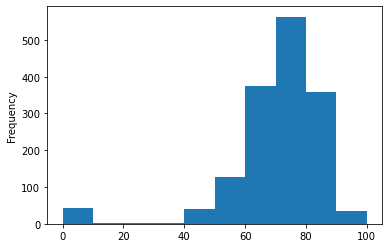

In [145]:
df["Popularity"].astype("int").plot.hist()

Immediately, we realize that the variable 'Duration' is measured in ms, milleseconds. This does not make logical sense, so we will change it into minutes. 

In [146]:
duration_m = []
count = 160
for i in df["Duration (ms)"]:
    duration_m.append(round(int(i)/(1000*60),2))

In [147]:
cleaned_df['Duration (m)'] = duration_m

<AxesSubplot:title={'center':'Song duration in minutes'}, ylabel='Frequency'>

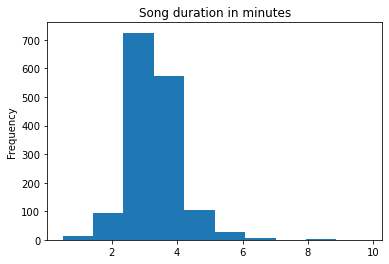

In [169]:
cleaned_df['Duration (m)'].plot.hist(title='Song duration in minutes')

### Histogram of other numerical columns 

<AxesSubplot:ylabel='Frequency'>

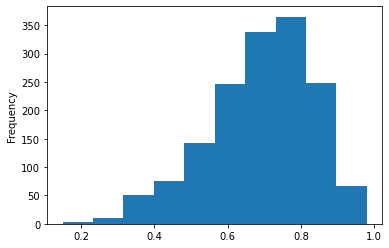

In [170]:
df["Danceability"].astype(float).plot.hist()

<AxesSubplot:ylabel='Frequency'>

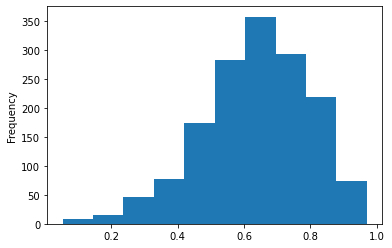

In [171]:
df["Energy"].astype(float).plot.hist()

<AxesSubplot:ylabel='Frequency'>

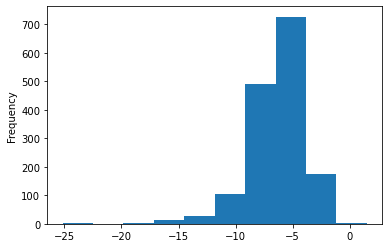

In [172]:
df["Loudness"].astype(float).plot.hist()

<AxesSubplot:ylabel='Frequency'>

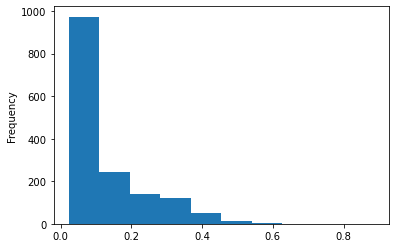

In [173]:
df["Speechiness"].astype(float).plot.hist()

<AxesSubplot:ylabel='Frequency'>

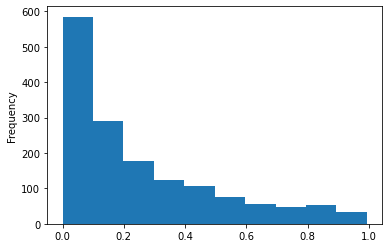

In [174]:
df["Acousticness"].astype(float).plot.hist()

<AxesSubplot:ylabel='Frequency'>

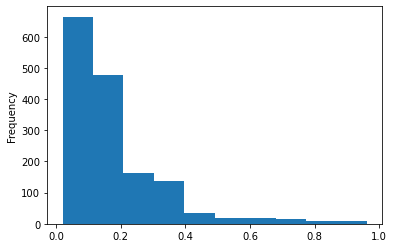

In [175]:
df["Liveness"].astype(float).plot.hist()

<AxesSubplot:ylabel='Frequency'>

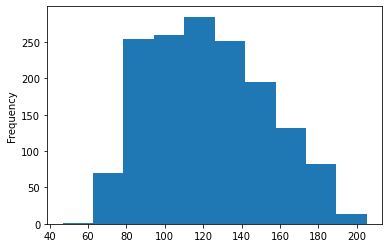

In [176]:
df["Tempo"].astype(float).plot.hist()

<AxesSubplot:ylabel='Frequency'>

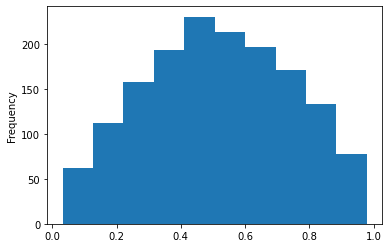

In [177]:
df["Valence"].astype(float).plot.hist()

General comment: 

- Mostly linearly distributed

In [194]:
import seaborn as sns
from matplotlib import pyplot as plt

<AxesSubplot:>

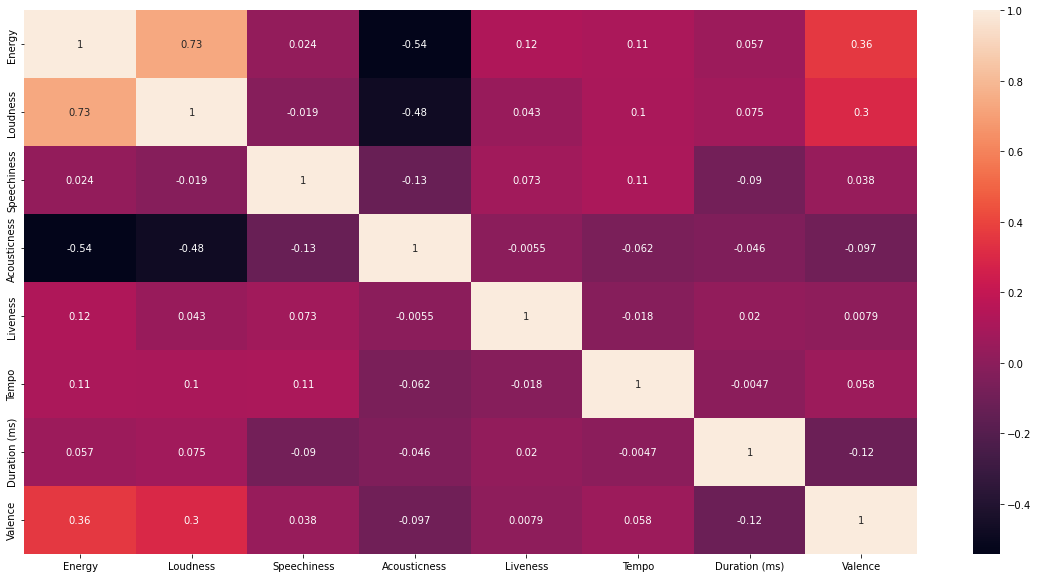

In [210]:
plt.figure(figsize=(20, 10))
sns.heatmap(df[['Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Liveness',
      'Tempo', 'Duration (ms)', 'Valence']].astype(float).corr(),annot=True)

### Below are changing categorical variables into dummy ones 

In [ ]:
import re

In [ ]:
ith_row = 0
cleaned_genre_col = []
for i in df["Genre"]:
    x=re.split("'",i)
    # avoids songs with no genre attribute 
    if len(x) > 1: 
       cleaned_genre_col.append(x[1])
    else:
        cleaned_genre_col.append(' ')

In [ ]:
# change it into pop, not-pop
dummy_genre = []
for i in cleaned_genre_col:
    if re.search('pop',i):
        dummy_genre.append('pop')
    else:
        dummy_genre.append('not-pop') 

In [ ]:
dummy_time = []
for i in df["Week of Highest Charting"]:
    if re.match('2019',i):
        dummy_time.append("pre-covid")
    else :
        dummy_time.append("covid")

In [ ]:
import statsmodels.api as sm
import pylab as py

/opt/conda/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


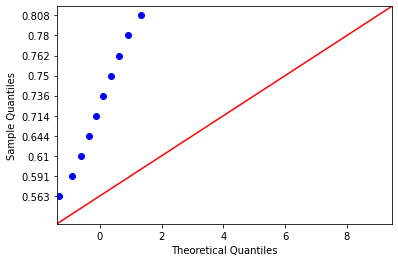

In [ ]:
sm.qqplot(df["Danceability"][0:10], line ='45')
py.show()

## Discussion  (what does your analysis show, what is the big picture, and how are these findings useful?) (500) 

## Conclusion